In [1]:
!pip install plotly==5.6.0

In [2]:
!pip install shapely

In [3]:
!pip install intake-geopandas

     |████████████████████████████████| 1.5 MB 4.0 MB/s            
     |████████████████████████████████| 1.0 MB 15.1 MB/s            
     |████████████████████████████████| 16.7 MB 863 kB/s            
     |████████████████████████████████| 6.3 MB 23.9 MB/s            
     |████████████████████████████████| 1.1 MB 60.4 MB/s            
     |████████████████████████████████| 596 kB 54.3 MB/s            
     |████████████████████████████████| 136 kB 61.7 MB/s            
     |████████████████████████████████| 96 kB 16.2 MB/s            
     |████████████████████████████████| 55 kB 12.2 MB/s            


In [3]:
#%% Module
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pathlib

# Import functions
from netopt import netopt, print_solution, plot_map
from data_structures import (show_data, set_capacity, set_all_capacities, set_fixed_cost,
                             set_all_fixed_costs, scale_demand, scale_all_demands, set_demand,
                             set_all_demands, calculate_dm)
import shapely
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon

# Import data
# The variable customers_as_is contains the existing customers, while the variable customers_to_be contains both
# existing and prospective customers
# The variable warehouses contains all the candidate locations, including the existing one (Bologna, id 6)

from data.projectwork_data import warehouses, customers_as_is, customers_to_be

In [4]:
cur_customer = pd.read_excel('datasets_csv/CurrentCustomers.xlsx')
print(cur_customer.head())

   Unnamed: 0  Id Identifier     City  Latitude  Longitude  Demand
0           0   0      Milan    Milan   45.4669     9.1900    1366
1           1   1      Turin    Turin   45.0667     7.7000     871
2           2   2      Genoa    Genoa   44.4072     8.9340     580
3           3   3    Bologna  Bologna   44.4939    11.3428     389
4           4   4     Venice   Venice   45.4397    12.3319     261


In [5]:
new_customer = pd.read_excel('datasets_csv/ProspectiveCustomers.xlsx')
print(new_customer.head())

   Unnamed: 0  Id Identifier      City  Latitude  Longitude  Demand
0          31  31       Rome      Rome   41.8931    12.4828    2873
1          32  32     Naples    Naples   40.8333    14.2500     966
2          33  33    Palermo   Palermo   38.1157    13.3613     668
3          34  34   Florence  Florence   43.7714    11.2542     381
4          35  35       Bari      Bari   41.1253    16.8667     323


In [6]:
loc_warehouse = pd.read_excel('datasets_csv/CandidateLocations.xlsx')
print(loc_warehouse.head())

   Unnamed: 0  Id Identifier     City  Latitude  Longitude  \
0           0   0       Rome     Rome   41.8931    12.4828   
1           1   1      Milan    Milan   45.4669     9.1900   
2           2   2     Naples   Naples   40.8333    14.2500   
3           3   3      Turin    Turin   45.0667     7.7000   
4           4   4    Palermo  Palermo   38.1157    13.3613   

   Max yearly capacity  Yearly fixed cost  
0                 9000             100000  
1                 8000             100000  
2                 8000             100000  
3                 7000             100000  
4                 6000             100000  


In [7]:
Bologna_warehouse = pd.DataFrame(loc_warehouse.iloc[6:7])
print(Bologna_warehouse.head())

   Unnamed: 0  Id Identifier     City  Latitude  Longitude  \
6           6   6    Bologna  Bologna   44.4939    11.3428   

   Max yearly capacity  Yearly fixed cost  
6                 7000              60000  


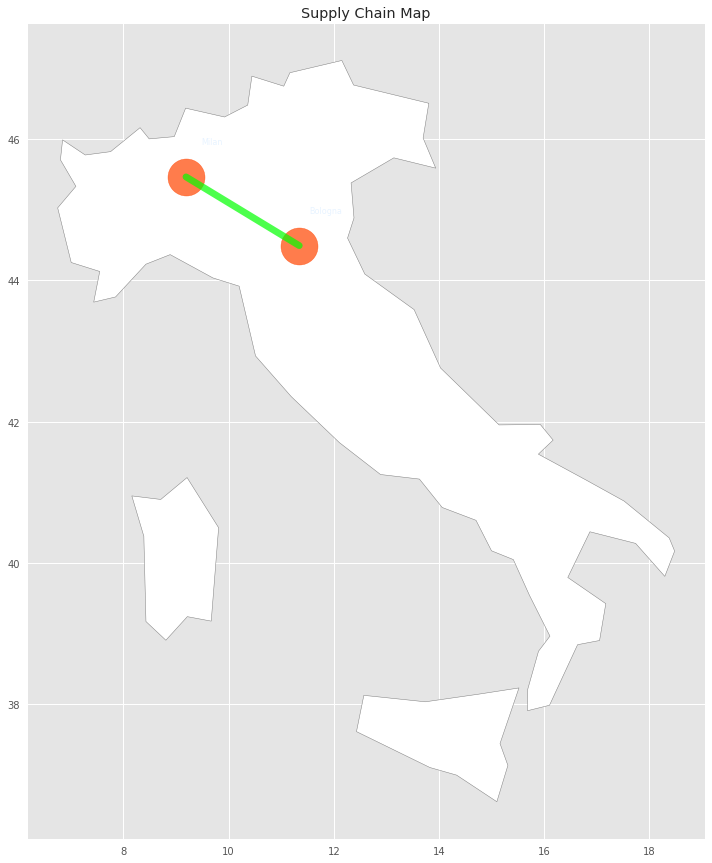

In [8]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world[world.name == "Italy"].plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    for slat, dlat, slon, dlon, num_flights, src_city, dest_city in zip(Bologna_warehouse["Latitude"], cur_customer["Latitude"], Bologna_warehouse["Longitude"], cur_customer["Longitude"], cur_customer["Demand"], Bologna_warehouse["City"], cur_customer["City"]):
        plt.plot([slon , dlon], [slat, dlat], linewidth=num_flights/200, color="lime", alpha=0.7)
        plt.scatter( [slon, dlon], [slat, dlat], color="orangered", alpha=0.7, s=num_flights)

        plt.text(slon+0.5, slat+0.5, src_city, fontsize=8, color="dodgerblue", alpha=0.1, horizontalalignment='center', verticalalignment='center')
        plt.text(dlon+0.5, dlat+0.5, dest_city, fontsize=8, color="dodgerblue", alpha=0.1, horizontalalignment='center', verticalalignment='center')

    plt.title("Connection Map Depicting Flights between Cities of Brazil")

    #plt.savefig("connection-map-geopandas-5.png", dpi=100)
        

    plt.title("Supply Chain Map")

In [11]:
line_point = LineString([(11.3428,44.4939),(11.3429,44.4938)])
line0 = LineString([(11.3428,44.4939),(9.1900,45.4669)])
line1 = LineString([(11.3428,44.4939),(7.7000,45.0667)])
line2 = LineString([(11.3428,44.4939),(8.9340,44.4072)])
line3 = LineString([(11.3428,44.4939),(12.3319,45.4397)])
line4 = LineString([(11.3428,44.4939),(10.9928,45.4386)])   
line5 = LineString([(11.3428,44.4939),(11.8778,45.4064)])   
line6 = LineString([(11.3428,44.4939),(13.7703,45.6503)])   
line7 = LineString([(11.3428,44.4939),(10.2203,45.5389)])                         
line8 = LineString([(11.3428,44.4939),(10.3280,44.8015)])   
line9 = LineString([(11.3428,44.4939),(10.9257,44.6458)])   
line10 = LineString([(11.3428,44.4939),(10.6333,44.7000)])   
line11 = LineString([(11.3428,44.4939),(12.1994,44.4178)])   
line12 = LineString([(11.3428,44.4939),(11.6199,44.8353)])   
line13 = LineString([(11.3428,44.4939),(9.2736,45.5836)])   
line14 = LineString([(11.3428,44.4939),(9.6700,45.6950)])   
line15 = LineString([(11.3428,44.4939),(11.1167,46.0667)])                          
line16 = LineString([(11.3428,44.4939),(11.5500,45.5500)])   
line17 = LineString([(11.3428,44.4939),(11.3500,46.5000)])   
line18 = LineString([(11.3428,44.4939),(8.6167,45.4500)])   
line19 = LineString([(11.3428,44.4939),(9.7000,45.0500)])   
line20 = LineString([(11.3428,44.4939),(13.2333,46.0667)])   
line21 = LineString([(11.3428,44.4939),(8.6200,44.9133)])   
line22 = LineString([(11.3428,44.4939),(12.2381,45.4906)])   
line23 = LineString([(11.3428,44.4939),(12.2422,45.6722)])                   
line24 = LineString([(11.3428,44.4939),(8.8518,45.6120)])   
line25 = LineString([(11.3428,44.4939),(9.0861,45.8103)])   
line26 = LineString([(11.3428,44.4939),(9.2333,45.5333)])   
line27 = LineString([(11.3428,44.4939),(8.8333,45.8167)])   
line28 = LineString([(11.3428,44.4939),(8.2069,44.9000)])   
line29 = LineString([(11.3428,44.4939),(9.2167,45.5500)])

po_x,po_y = line_point.coords.xy
x0,y0 = line0.coords.xy
x1,y1 = line1.coords.xy
x2,y2 = line2.coords.xy
x3,y3 = line3.coords.xy
x4,y4 = line4.coords.xy
x5,y5 = line5.coords.xy
x6,y6 = line6.coords.xy
x7,y7 = line7.coords.xy
x8,y8 = line8.coords.xy
x9,y9 = line9.coords.xy
x10,y10 = line10.coords.xy
x11,y11 = line11.coords.xy
x12,y12 = line12.coords.xy
x13,y13 = line13.coords.xy
x14,y14 = line14.coords.xy
x15,y15 = line15.coords.xy
x16,y16 = line16.coords.xy
x17,y17 = line17.coords.xy
x18,y18 = line18.coords.xy
x19,y19 = line19.coords.xy
x20,y20 = line20.coords.xy
x21,y21 = line21.coords.xy
x22,y22 = line22.coords.xy
x23,y23 = line23.coords.xy
x24,y24 = line24.coords.xy
x25,y25 = line25.coords.xy
x26,y26 = line26.coords.xy
x27,y27 = line27.coords.xy
x28,y28 = line28.coords.xy
x29,y29 = line29.coords.xy

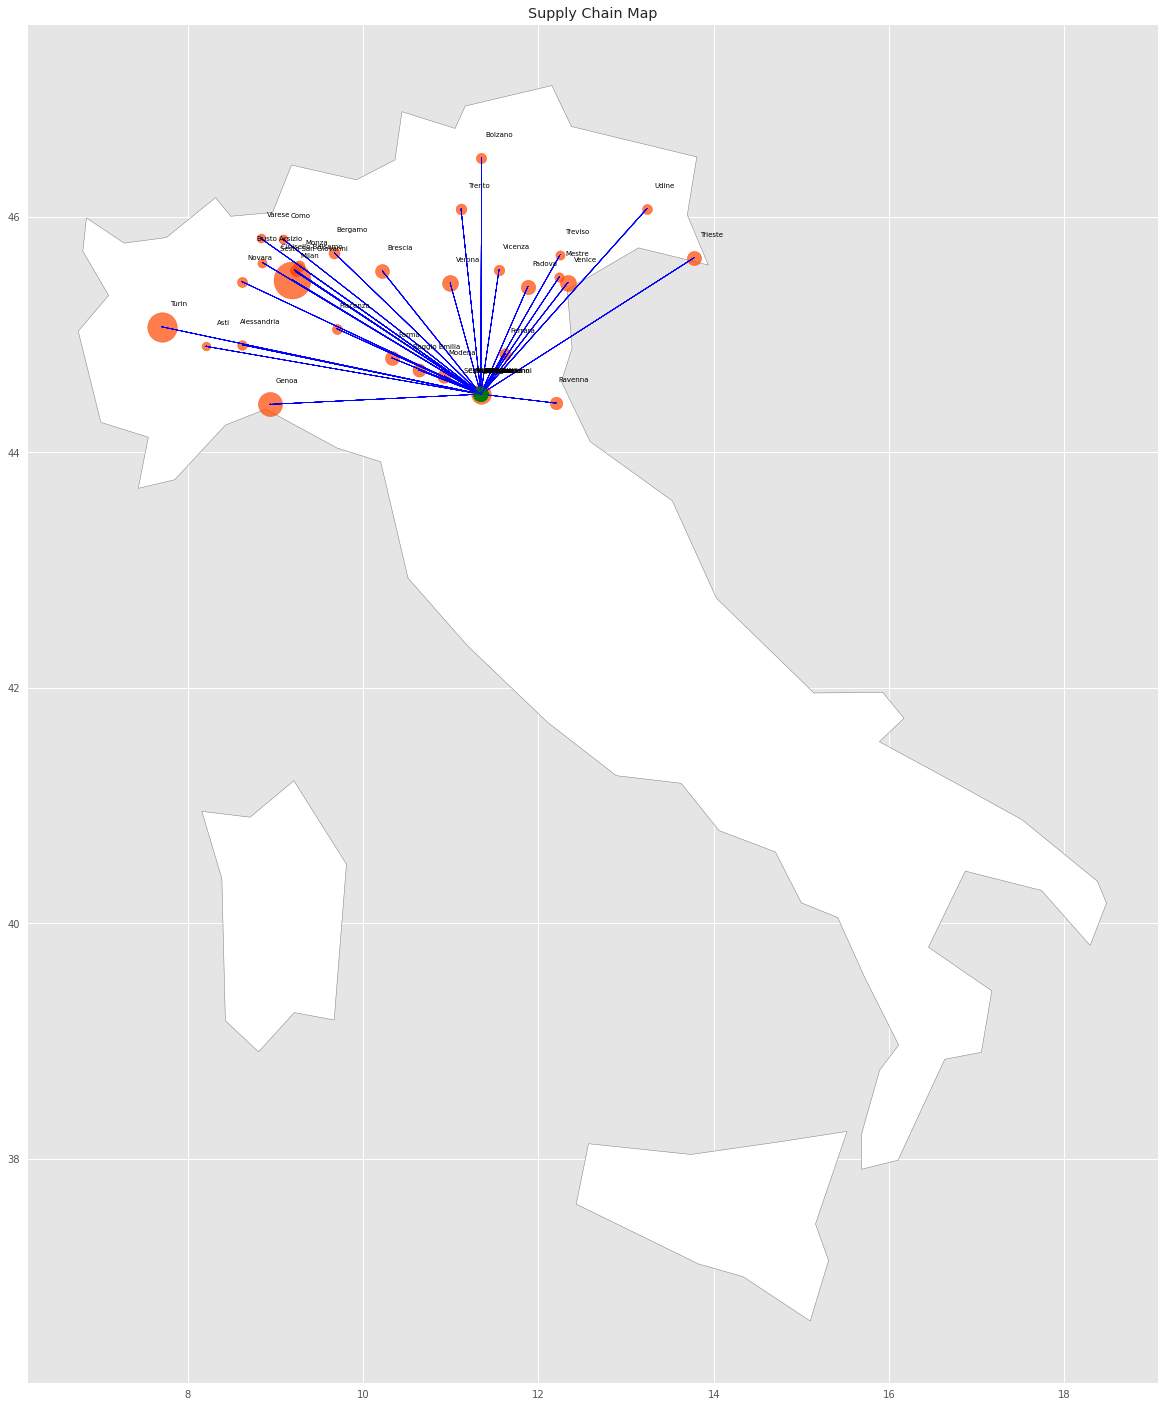

In [27]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world[world.name == "Italy"].plot(figsize=(25,25), edgecolor="grey", color="white");                                                                   
    
    ## Loop through each flight plotting line depicting flight between source and destination
    for dlat, dlon, demand, city in zip(cur_customer["Latitude"], cur_customer["Longitude"], cur_customer["Demand"], cur_customer["City"]):
        #plt.plot([dlon,dlat], linewidth=3, color="red", alpha=0.7)
        plt.plot(po_x,po_y, marker='D',linewidth=15,color="green", alpha=0.7)
        plt.scatter(dlon,dlat, color="orangered", alpha=0.7, s=demand)
        plt.plot(x0,y0, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x1,y1, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x2,y2, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x3,y3, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x4,y4, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x5,y5, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x6,y6, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x7,y7, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x8,y8, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x9,y9, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x10,y10, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x11,y11, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x12,y12, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x13,y13, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x14,y14, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x15,y15, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x16,y16, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x17,y17, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x18,y18, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x19,y19, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x20,y20, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x21,y21, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x22,y22, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x23,y23, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x24,y24, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x25,y25, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x26,y26, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x27,y27, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x28,y28, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x29,y29, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        
        plt.text(slon+0.2, slat+0.2, city, fontsize=7, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
        plt.text(dlon+0.2, dlat+0.2, city, fontsize=7, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')

    plt.savefig("connection-map-geopandas-5.png", dpi=400)
    plt.title("Supply Chain Map")

In [ ]:
# Evaluation AS-IS on map with boundaries
df_regions = gpd.read_file(filename='Reg01012016_g_WGS84.shx')
ax = df_regions.plot(edgecolor='white', linewidth=1, figsize=(15,15))

## Loop through each flight plotting line depicting flight between source and destination
for dlat, dlon, demand, city in zip(cur_customer["Latitude"], cur_customer["Longitude"], cur_customer["Demand"], cur_customer["City"]):
    plt.plot(po_x,po_y, marker='D',linewidth=15,color="green", alpha=0.7)
    plt.scatter(dlon,dlat, color="orangered", alpha=0.7, s=demand)
    plt.plot(x0,y0, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x1,y1, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x2,y2, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x3,y3, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x4,y4, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x5,y5, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x6,y6, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x7,y7, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x8,y8, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x9,y9, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x10,y10, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x11,y11, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x12,y12, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x13,y13, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x14,y14, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x15,y15, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x16,y16, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x17,y17, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x18,y18, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x19,y19, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x20,y20, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x21,y21, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x22,y22, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x23,y23, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x24,y24, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x25,y25, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x26,y26, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x27,y27, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x28,y28, marker=',',linewidth=0.5, color='blue',alpha=0.5)
    plt.plot(x29,y29, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        
    plt.text(slon+0.2, slat+0.2, city, fontsize=7, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
    plt.text(dlon+0.2, dlat+0.2, city, fontsize=7, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')

    plt.savefig("connection-map-geopandas-5.png", dpi=400)
    plt.title("Supply Chain Map")